# Final Project CompStats | Timo Haupt | SoSe 2021

---

# Comparison of Causal Forests and K-Nearest-Neighbour Matching in Identifying Heterogeneous Treatment Effects

---

**Importing Packages:**

In [2]:
suppressMessages(library(grf))
suppressMessages(library(FNN))
suppressMessages(library(MASS))

## Structure

[**1.) Theoretical Discussion**](#theory)
   * [Causal Forests](#cf)
   * [K-Nearest-Neighbour Matching](#knn)
   * ?Treatment Estimation using Matching Methods?
    
[**2.) Simulation Study**](#simulation)
   * [Data Generating Process (Treatment Effect Heterogeneity)](#dgp)
   * [Variations](#simstudy)

**3.) Application**
   * Data: Farbmacher
   * Replication of Paper
   * Extension with Causal KNN and Comparison

**4.) Conclusion**

[**5.) References**](#references)

## 1.) Theoretical Discussion<a id="theory"></a>

This first section introduces the two analyzed estimation methods, Causal Forest and Causal KNN, and describes how treatment estimation is conducted. The main problem in settings covering causality and inference is the missing counterfactual. Particularly in estimating treatment effects it's only possible to observe an individual with treatment, $Y_i^{(1)}$, or without treatment, $Y_i^{(0)}$, but never both. Therefore, we are in the Potential Outcome Framework where we "posit the existence of potential outcomes $Y_i^{(1)}$ and $Y_i^{(0)}$ corresponding respectively to
the response the $i$-th subject would have experienced with and without the treatment" (Athey/Wager, 2015).

Both introduced methods, Causal Forest and Causal KNN, try to find these potential outcomes by some sort of matching algorithm in order to estimate the treatment effect 
$$\tau(x) = \mathbb{E}\left[Y_i^{(1)} - Y_i^{(0)} \mid X_i = x\right] $$

One essential assumption we need to impose in order to theoretically justify both methods is unconfoundedness, i.e. "treatment assignment $W_i$ is independent of the potential outcomes for $Y_i$ conditional on $X_i$" (Athey & Wager 2015).

$$\left \{Y_i^{(1)}, Y_i^{(0)} \right \} \perp\!\!\!\perp W_i \mid X_i $$

The idea is that, if unconfoundedness holds, "we can treat nearby observations in x-space as having come from a
randomized experiment; thus, nearest-neighbor matching and other local methods will in general be consistent for $\tau(x)$" (Athey & Wager 2015).

### Causal Forests

**From Trees to Forests**

Causal Trees are very similiar to Random Trees. 

**Treatment Effect Estimation with CF**


Let's take some $x \in R_k$ where $R_k$ is some leaf of the Causal Forest and define $N_k(w)$ as the number of observations in the leaf $R_k$ with treatment status $w \in \{0,1\}$. The Conditional Average Treatment Effect is then estimated "based on the mean difference between the outcome levels of the treated and untreated units" which are in the same leaf $R_k$ by 

$$ \hat{\tau}(x) = \hat{\tau}_{R_k} = \frac{1}{N_k(1)} \sum_{i \in R_k(1)} Y_i-\frac{1}{N_k(0)} \sum_{i \in R_k(0)} Y_i  $$
So, the Causal Forest does some sort of matching by recursively partitioning the predictor space and then matching treated and untreated observations that have fallen in the same leaf (see e.g. Hitsch & Misra 2018 and Athey & Wager 2015).

**Honest Splitting Rule**

Athey & Wager (2019b) Chapter 2.4

**Advantage of CF**

"At a high level, trees and forests can be thought of as nearest neighbor methods with an
adaptive neighborhood metric. Given a test point x, classical methods such as k-nearest
neighbors seek the k closest points to x according to some pre-specied distance measure,
e.g., Euclidean distance. In contrast, tree-based methods also seek to nd training examples
that are close to x, but now closeness is dened with respect to a decision tree, and the
closest points to x are those that fall in the same leaf as it. The advantage of trees is that
their leaves can be narrower along the directions where the signal is changing fast and wider
along the other directions, potentially leading a to a substantial increase in power when the
dimension of the feature space is even moderately large." (Athey & Wager 2015)

"When estimating a random forest, we provide the algorithm with the set of features and the
treatment indicator, Wi. Specifying the interactions between Xi and Wi is not be necessary
because random forests, a non-parametric estimation method, in principle should be able to
automatically detect any relevant interactions." (Farbmacher et al.)
#### GRF package


### Causal KNN


**Siehe Hitsch, Misra!**

## 2.) Simulation Study<a id="simulation"></a>

### Data Generating Process<a id="dgp"></a>

**Performance Measure**

Eventhough the counterfactuals are never observed in real life data, we can take advantage of the data generating process in simulation studies where we explicitely calculate the true treatment effect for each observation. Therefore, as Athey & Wager (2015) proposed we can use the $MSE_{\tau}$ as a performance measure in this simulation study in order to compare between methods and different treatment settings. I calculated the Mean Squared Error of the treatment effect as follows
$$
MSE_{\tau} \equiv \frac{1}{\#\left(\mathcal{S}^{\mathrm{te}}\right)} \sum_{i \in \mathcal{S}^{\mathrm{te}}}{\left(\tau_{i}-\hat{\tau}\left(X_{i} ; \mathcal{S}^{\mathrm{est}}, \Pi\right)\right)^{2}}
$$
, where $ \mathcal{S}^{\mathrm{est}} $ is the subsample that was used to estimate the treatment effects within the leafs
, $\mathcal{S}^{\mathrm{te}}$ is the test sample that was used to construct the causal tree
and $\Pi$ is the partition of the causal tree.
The notations of $\mathcal{S}^{\mathrm{est}}$ and $\mathcal{S}^{\mathrm{te}}$ are consistent with the honest splitting rule described in the first section. Note that the $MSE_{\tau}$ used in my simulation study differs slightly from the one in the Athey and Imbens (2015) paper. They subtract $\mathbb{E}[\tau_i^2]$, but as they noted "it does not affect how the criterion ranks estimators", since $\tau_i$ is not a Random Variable. 

# Creating a Single DGP Function

In [ ]:
dgp_ <- function(p,N,case) { 
    
    X <- matrix(rnorm(n=N*p,0,1), N, p)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    if (case == "case1"){
        t <- 0.2
    }
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

### Variations<a id="simstudy"></a>

### Case 1 - Basic Set Up


$$X_{i,1}, ..., X_{i,10} \sim \mathcal{N}(0,1)$$

$$\beta \in [0.5,1]^{10}$$

$$Prob(W_i=1) =0.5$$

$$\tau = 0.2 $$

$$Y_i = X \beta + \tau* W_i + \epsilon_i $$

$$\epsilon_i \sim \mathcal{N}(0,\,0.1)$$

**Description & Result**

In the Basic Set Up 10 regressors drawn from a Standard Normal Distrubtion are considered where all $\beta$ are evenly divided between 0.5 and 1. Furthermore, the probability of being assigned to treatment is fixed at 50% for all observations and there is only one treatment effect $\tau$ independent of individuals' characteristics.
It can be observed that the higher the number of observations, the smaller the Mean Squared Error. This holds for all successive applications. Even in the basic set up the Causal Forest performs way better than 10- and 20-Nearest-Neighbors. This holds also true for almost all applications and that's why I focus more on the comparison between the different settings. Furthermore, considering more matched neighbors always decreases $MSE_{\tau}$ which is consistent with the results of Athey and Wager (2015). 

In [3]:
dgp1 <- function(p,N) { 
    
    X <- matrix(rnorm(n=N*p,0,1), N, p)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.2
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [151]:
simstudy(p=10,numsim=100,dgp1)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.213,0.117,0.090,0.073
KNN-10,0.757,0.700,0.609,0.531
KNN-20,0.452,0.404,0.356,0.304


### Case 2 - Introducing Simple Treatment Heterogeneity

$$\tau(x) = 0.1 + 0.1*\mathbb{1}(x_1 > 0) + 0.1*\mathbb{1}(x_2 > 0)$$


**Description & Result**

The second simulation introduces some simple treatment effect heterogeneity, that is treatment effect increases if an individual has positive values in its' $X_1$ and $X_2$ characteristics respectively. Each positive value increases the magnitude by the mean treatment effect of 0.1. 
As can be seen in the table below, the Mean Squared Errors almost don't differ from the previous case with homogeneous treatment effects. This result is quite remarkable and shows that both methods are quite good in matching observations with a simple heterogeneity structure. It should be noted that Powers et al. (2017) find some striking differences between Scenarios 1 and 2 in their paper which come closest to my simulations 1 and 2. One reason might be that Powers et al. (2017) draw their regressors mixed from Standard Normal and Bernoulli distributions. 

* **Macht es Sinn, dass mit konstantem Treatment Effect der MSE schlechter ist, als mit heterogenem?** Zitat finden: Causal Forest splittet nach dem Kriterium, dass die Streuung der Treatment Effekte möglichst groß ist.

In [4]:
dgp2 <- function(p,N) { 
    
    X <- matrix(rnorm(n=N*p,0,1), N, p)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.1 + 0.1*ifelse(X[,1] > 0, 1, 0) +  0.1*ifelse(X[,2] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [153]:
simstudy(p=10,numsim=100,dgp2)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.246,0.136,0.110,0.073
KNN-10,0.740,0.664,0.598,0.541
KNN-20,0.446,0.391,0.342,0.310


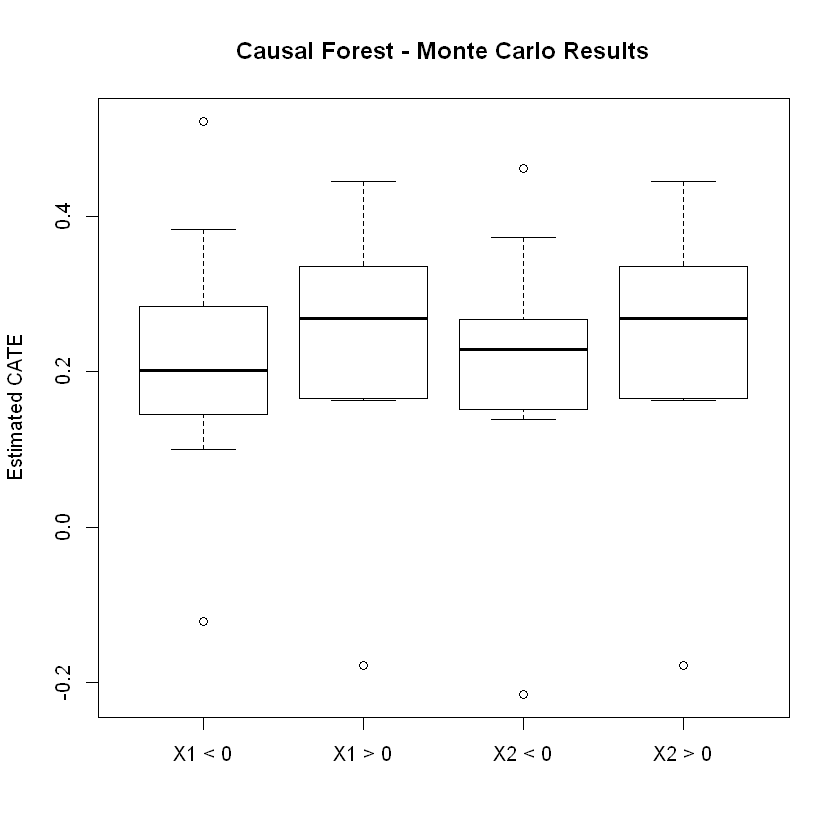

In [31]:
CF_simstudy(p=10,N=500,numsim=10,dgp2)

### Case 3 - Treatment Heterogeneity 


$$\tau(x) = 0.1 + \mathbb{1}(x_1 > 0)*x_1 + \mathbb{1}(x_2 > 0)*x_2$$

**Description & Result**

In this scenario magnitude of treatment depends on the values of $X_1$ and $X_2$. So, treatment effect is even heterogeneous within $X_1$ and $X_2$. Higher positive values of these variables imply a higher treatment effect.
Since this specification implies a higher degree of variation in individual treatment effects, it is obvious that the Mean Squared Errors are much higher compared to the previous scenario. 

In [32]:
dgp3 <- function(p,N) { 
    
    X <- matrix(rnorm(n=N*p,0,1), N, p)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.1 + X[,1]*ifelse(X[,1] > 0, 1, 0) +  X[,2]*ifelse(X[,2] > 0, 1, 0) 
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [155]:
simstudy(p=10,numsim=100,dgp3)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.847,0.695,0.565,0.371
KNN-10,1.201,1.125,0.982,0.822
KNN-20,0.934,0.864,0.752,0.627


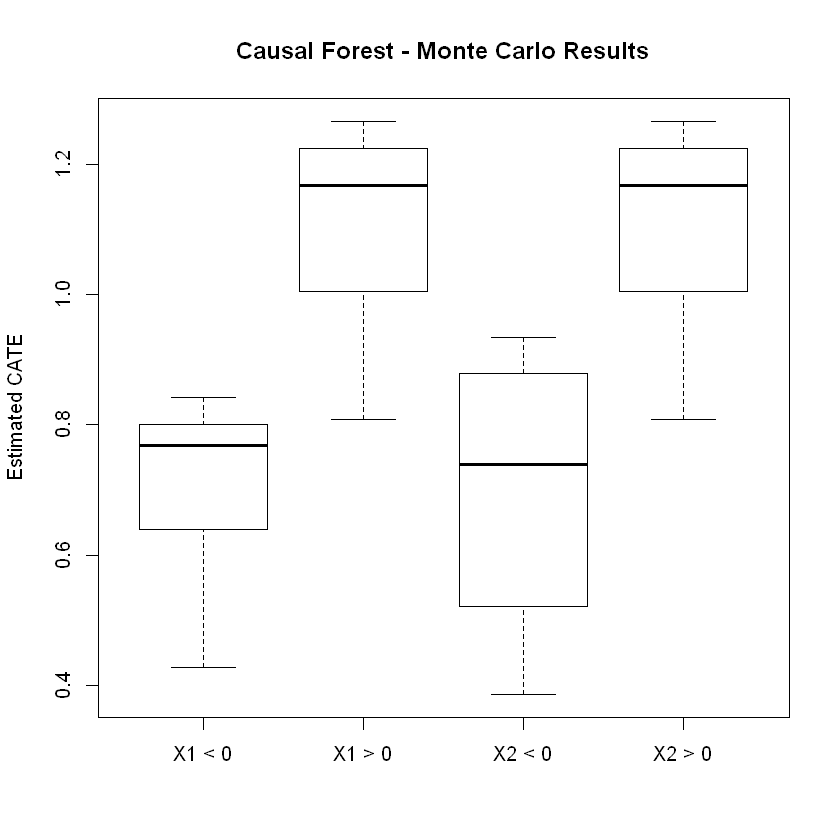

In [33]:
CF_simstudy(p=10,N=500,numsim=10,dgp3)

### Case 4 - Treatment Heterogeneity depends on more regressors

$$\tau(x) = 0.1 + \sum_{i=1}^{4} \mathbb{1}(x_i > 0)*x_i $$

**Description & Result**

Here the individual treatment effect depends on a larger amount of regressors, that is on four rather than on only two regressors. Also, the magnitude of the effect depends on the values of the $X_i$ characteristics. Adding two more regressors to the treatment effect implies another decrease in performance. These results are consistent with the ones from Table S1 (Appendix) in Athey and Imbens (2015), where Design 2 and 3 are similiar to the scenarios considered here in Case 3 and 4. 
Interesting is that now KNN with 20 matched neighbors performs pretty well relative to the Causal Forest.

In [34]:
dgp4 <- function(p,N) { 
    
    X <- matrix(rnorm(n=N*p,0,1), N, p)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.1 + X[,1]*ifelse(X[,1] > 0, 1, 0) +  X[,2]*ifelse(X[,2] > 0, 1, 0) + X[,3]*ifelse(X[,3] > 0, 1, 0) + X[,4]*ifelse(X[,4] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [157]:
simstudy(p=10,numsim=100,dgp4)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,1.487,1.309,1.066,0.788
KNN-10,1.704,1.573,1.370,1.184
KNN-20,1.498,1.342,1.178,1.001


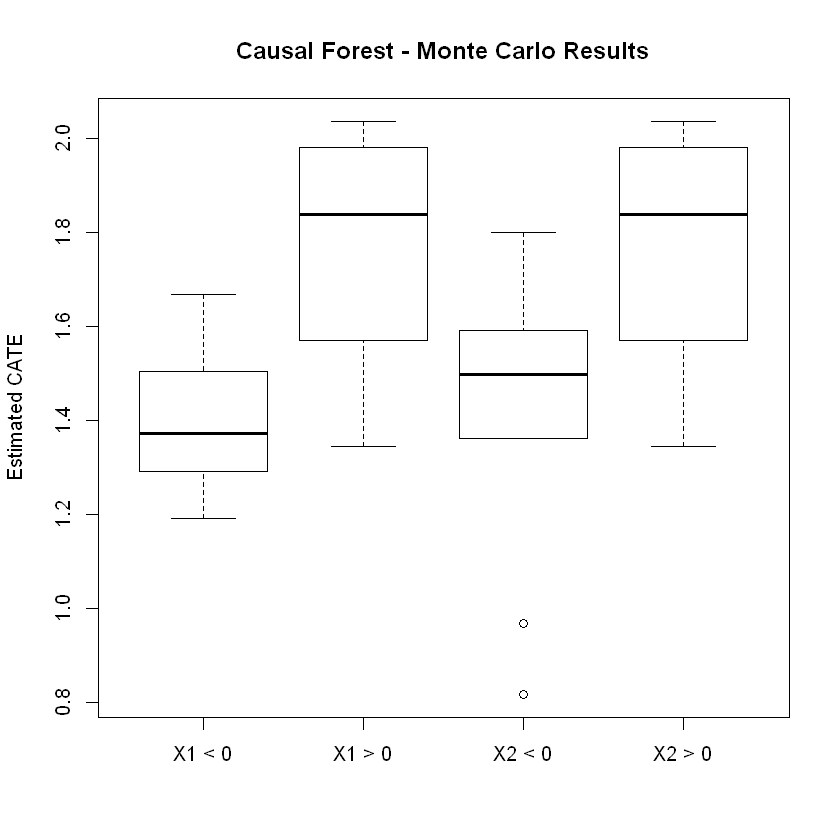

In [35]:
CF_simstudy(p=10,N=500,numsim=10,dgp4)

## Case 5.1 und 5.2 rausnehmen

## Dafür: Introduce Higher Degree Polynomials and Interactions

"When estimating a random forest, we provide the algorithm with the set of features and the
treatment indicator, Wi. Specifying the interactions between Xi and Wi is not be necessary
because random forests, a non-parametric estimation method, in principle should be able to
automatically detect any relevant interactions." (Hitsch & Misra 2018)

In [44]:
dgp53 <- function(p,N) { 
    
    X <- matrix(rnorm(n=N*p,0,1), N, p)
    X[,p-1] <- X[,1]^2
    X[,p] <- X[,2]^2

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.1 + 0.1*ifelse(X[,1] > 0, 1, 0) +  0.1*ifelse(X[,2] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [45]:
simstudy(p=10,numsim=100,dgp53)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.277,0.170,0.107,0.070
KNN-10,0.778,0.660,0.650,0.544
KNN-20,0.430,0.379,0.370,0.318


In [ ]:
dgp54 <- function(p,N) { 
    
    X <- matrix(rnorm(n=N*p,0,1), N, p)
    X[,p-1] <- X[,1]^2
    X[,p] <- X[,1]^3

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.1 + 0.1*ifelse(X[,1] > 0, 1, 0) +  0.1*ifelse(X[,2] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [ ]:
simstudy(p=10,numsim=100,dgp54)

In [ ]:
dgp55 <- function(p,N) { 
    
    X <- matrix(rnorm(n=N*p,0,1), N, p)
    X[,2] <- X[,1]^2
    #X[,p] <- X[,2]^3

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.1 + 0.1*ifelse(X[,1] > 0, 1, 0) +  0.1*ifelse(X[,2] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [ ]:
simstudy(p=10,numsim=100,dgp55)

### Case 5.1 - Treatment Heterogeneity depends on interactions of covariates

$$\tau(x) = 0.2 + x_1*x_2 $$

In Case 5.1 a simple interaction term is introduced in $\tau(x)$. 
Since $X$ are standard normal distributed, around half of the draws from $X_1$ and $X_2$ are negative. Therefore, we encounter a lot of variation in the treatment effect, which doesn't lead to an improved performance compared to Case 2 and 3. 

In [37]:
dgp5 <- function(p,N) { 
    
    X <- matrix(rnorm(n=N*p,0,1), N, p)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.2 + X[,1]*X[,2]
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [43]:
simstudy(p=10,numsim=100,dgp5)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,1.220,1.176,1.099,0.979
KNN-10,1.606,1.426,1.296,1.142
KNN-20,1.409,1.283,1.147,1.009


### Case 5.2 - Treatment Heterogeneity depends on interactions of covariates

$$ \tau(x) = 0.2+ \mid x_1 * x_2 \mid $$

In [41]:
dgp52 <- function(p,N) { 
    
    X <- matrix(rnorm(n=N*p,0,1), N, p)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.2 + abs(X[,1]*X[,2])  #*ifelse(X[,1] > 0, 1, 0))
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [178]:
simstudy(p=10,numsim=100,dgp52)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.766,0.720,0.615,0.551
KNN-10,1.245,1.204,1.061,0.983
KNN-20,0.972,0.961,0.851,0.805


### Case 6 - Simple Treatment Heterogeneity and Correlation between some regressors



### Case 6.1 - Treatment Heterogeneity and Correlation between some regressors

$$ \sigma_j^2 = 1 \qquad \forall j = \{1,...,10\}$$

$$ \rho_{j,k} = 0.5 \qquad \forall j,k = \{1,...,10\} \quad s.t. \quad j \ne k  $$

$$\tau(x) = 0.1 + 0.1*\mathbb{1}(x_1 > 0) + 0.1*\mathbb{1}(x_2 > 0) \qquad (1)$$

$$\tau(x) = 0.1 + \mathbb{1}(x_1 > 0)*x_1 + \mathbb{1}(x_2 > 0)*x_2 \qquad (2)$$

In [193]:
#### dgp6

#### dgp65

### Case 6.2 - Treatment Heterogeneity and Correlation between some regressors

$$ \sigma_j^2 = 1 \qquad \forall j = \{1,...,10\}$$

$$ \rho_{1,2} = 0.9$$

$$ \rho_{j,k} = 0 \qquad \forall j,k = \{3,4,...,10\} \quad s.t. \quad j \ne k  $$

$$\tau(x) = 0.1 + 0.1*\mathbb{1}(x_1 > 0) + 0.1*\mathbb{1}(x_2 > 0) \qquad (1)$$

$$\tau(x) = 0.1 + \mathbb{1}(x_1 > 0)*x_1 + \mathbb{1}(x_2 > 0)*x_2 \qquad (2)$$

In [194]:
#### dgp62

#### dgp66

### Case 6.3 - Treatment Heterogeneity and Correlation between some regressors

$$ \sigma_j^2 = 1 \qquad \forall j = \{1,...,10\}$$

$$ \rho_{1,2} = 0.9$$

$$ \rho_{j,k} = 0.5 \qquad \forall j,k = \{5,7,9\} \quad s.t. \quad j \ne k  $$

$$ \rho_{j,k} = 0 \qquad \forall j,k = \{3,4,6,8,10\} \quad s.t. \quad j \ne k  $$

$$\tau(x) = 0.1 + 0.1*\mathbb{1}(x_1 > 0) + 0.1*\mathbb{1}(x_2 > 0) \qquad (1)$$

$$\tau(x) = 0.1 + \mathbb{1}(x_1 > 0)*x_1 + \mathbb{1}(x_2 > 0)*x_2 \qquad (2)$$

In [195]:
#### dgp63

#### dgp67

In [192]:
dgp6 <- function(p,N) { 
    
    mu <- rep(0,p)
    Sigma <- 1
    sigma1 <- matrix(rep(0.5),3,3)
    for (i in 1:3){
        sigma1[i,i] <- Sigma
    }
    
    sigma <- diag(Sigma, p, p)

    
    X <- mvrnorm(N, mu, sigma)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.1 + 0.1*ifelse(X[,1] > 0, 1, 0) +  0.1*ifelse(X[,2] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

$ \sigma_j^2 = 1 \qquad \forall j = \{1,...,10\}$

$\rho_{1,2} = 0.9 $

$\rho_{1,5} = 0.5 $

$\rho_{2,5} = 0.5 $

$ \rho_{j,k} = 0 \qquad \forall j,k = \{3,4,6,...,10\} \quad s.t. \quad j \ne k  $

In [190]:
dgp63 <- function(p,N) { 
    
    mu <- rep(0,p)
    Sigma <- 1
    sigma <- diag(Sigma, p, p)
    sigma[1,2] <- 0.9
    sigma[2,1] <- 0.9
    sigma[7,5] <- 0.5
    sigma[5,7] <- 0.5
    sigma[9,5] <- 0.5
    sigma[5,9] <- 0.5
    sigma[9,7] <- 0.5
    sigma[7,9] <- 0.5
    
    X <- mvrnorm(N, mu, sigma)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.1 + 0.1*ifelse(X[,1] > 0, 1, 0) +  0.1*ifelse(X[,2] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

$ \sigma_j^2 = 1 \qquad \forall j = \{1,...,10\}$

$\rho_{1,2} = 0.9 $


$ \rho_{j,k} = 0 \qquad \forall j,k = \{3,4,5,...,10\} \quad s.t. \quad j \ne k  $

In [164]:
dgp62 <- function(p,N) { 
    
    mu <- rep(0,p)
    Sigma <- 1
    sigma <- diag(Sigma, p, p)
    sigma[1,2] <- 0.9
    sigma[2,1] <- 0.9
    
    X <- mvrnorm(N, mu, sigma)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.1 + 0.1*ifelse(X[,1] > 0, 1, 0) +  0.1*ifelse(X[,2] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

$ \sigma_j^2 = 1 \qquad \forall j = \{1,...,10\}$

$\rho_{1,2} = - 0.9 $


$ \rho_{j,k} = 0 \qquad \forall j,k = \{3,4,5,...,10\} \quad s.t. \quad j \ne k  $

In [165]:
dgp64 <- function(p,N) { 
    
    mu <- rep(0,p)
    Sigma <- 1
    sigma <- diag(Sigma, p, p)
    sigma[1,2] <- -0.9
    sigma[2,1] <- -0.9
    
    X <- mvrnorm(N, mu, sigma)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.1 + 0.1*ifelse(X[,1] > 0, 1, 0) +  0.1*ifelse(X[,2] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [166]:
#### moderate correlation of all regressors

simstudy(p=10,numsim=100,dgp6)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.172,0.175,0.104,0.068
KNN-10,0.705,0.680,0.614,0.545
KNN-20,0.401,0.394,0.353,0.315


In [167]:
#### high POSITIVE correlation between variables that affect treatment heterogeneity

simstudy(p=10,numsim=100,dgp62)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.240,0.142,0.143,0.076
KNN-10,0.752,0.721,0.678,0.542
KNN-20,0.451,0.417,0.410,0.314


In [168]:
#### high NEGATIVE correlation between variables that affect treatment heterogeneity

simstudy(p=10,numsim=100,dgp64)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.212,0.135,0.095,0.054
KNN-10,0.701,0.627,0.554,0.490
KNN-20,0.419,0.360,0.321,0.283


In [191]:
#### high correlation between variables that affect treatment heterogeneity 
#### AND 
#### moderate correlation between regressors 5,7 and 9

simstudy(p=10,numsim=100,dgp63)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.260,0.171,0.110,0.077
KNN-10,0.882,0.795,0.705,0.580
KNN-20,0.551,0.489,0.444,0.348


In [170]:
#### high correlation between variables that affect treatment heterogeneity 
#### AND 
#### moderate correlation between regressors 5,7,9

simstudy(p=10,numsim=100,dgp63)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.269,0.152,0.111,0.085
KNN-10,0.846,0.703,0.665,0.556
KNN-20,0.532,0.421,0.404,0.328


In [179]:
dgp65 <- function(p,N) { 
    
    mu <- rep(0,p)
    Sigma <- 1
    sigma1 <- matrix(rep(0.5),3,3)
    for (i in 1:3){
        sigma1[i,i] <- Sigma
    }
    
    sigma <- diag(Sigma, p, p)
    #sigma[1,2] <- 0.9
    #sigma[2,1] <- 0.9
    
    X <- mvrnorm(N, mu, sigma)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.1 + X[,1]*ifelse(X[,1] > 0, 1, 0) +  X[,2]*ifelse(X[,2] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [180]:
#### Comparison to case 3

simstudy(p=10,numsim=100,dgp65)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.875,0.677,0.555,0.391
KNN-10,1.144,1.035,0.955,0.835
KNN-20,0.910,0.792,0.730,0.635


In [187]:
dgp66 <- function(p,N) { 
    
    mu <- rep(0,p)
    Sigma <- 1
    sigma <- diag(Sigma, p, p)
    sigma[1,2] <- 0.9
    sigma[2,1] <- 0.9
    
    X <- mvrnorm(N, mu, sigma)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.1 + X[,1]*ifelse(X[,1] > 0, 1, 0) +  X[,2]*ifelse(X[,2] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [189]:
#### Comparison to case 3

simstudy(p=10,numsim=100,dgp66)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,1.250,0.897,0.548,0.308
KNN-10,1.337,1.195,1.037,0.838
KNN-20,1.180,1.022,0.838,0.666


In [188]:
dgp67 <- function(p,N) { 
    
    mu <- rep(0,p)
    Sigma <- 1
    sigma <- diag(Sigma, p, p)
    sigma[1,2] <- 0.9
    sigma[2,1] <- 0.9
    sigma[7,5] <- 0.5
    sigma[5,7] <- 0.5
    sigma[9,5] <- 0.5
    sigma[5,9] <- 0.5
    sigma[9,7] <- 0.5
    sigma[7,9] <- 0.5
    
    X <- mvrnorm(N, mu, sigma)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.1 + X[,1]*ifelse(X[,1] > 0, 1, 0) +  X[,2]*ifelse(X[,2] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [184]:
#### Comparison to case 3

simstudy(p=10,numsim=100,dgp67)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,1.217,0.927,0.570,0.305
KNN-10,1.374,1.225,1.055,0.862
KNN-20,1.193,1.027,0.855,0.675


In [186]:
#### Comparison to case 3

simstudy(p=10,numsim=100,dgp66)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,1.300,1.005,0.587,0.306
KNN-10,1.481,1.271,1.057,0.898
KNN-20,1.283,1.085,0.862,0.705


### Case 7.1 - Simple Treatment Heterogeneity and only a few regressors influence $Y$

$$\tau(x) = 0.1 + 0.1*\mathbb{1}(x_1 > 0) + 0.1*\mathbb{1}(x_2 > 0)$$

$$\beta_4, ..., \beta_{10} = 0$$

* Basically Case 9 with fewer regressors!

In [171]:
dgp7 <- function(p,N) { 
    
    X <- matrix(rnorm(n=N*p,0,1), N, p)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    b_vec[4:p] <- 0
    
    #### true treatment effect 
    t <- 0.1 + 0.1*ifelse(X[,1] > 0, 1, 0) +  0.1*ifelse(X[,2] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [172]:
simstudy(p=10,numsim=100,dgp7)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.042,0.033,0.025,0.008
KNN-10,0.124,0.111,0.105,0.091
KNN-20,0.075,0.065,0.064,0.053


### Case 7.2 - Simple Treatment Heterogeneity and only a few regressors influence $Y$

$$\tau(x) = 0.1 + 0.1*\mathbb{1}(x_1 > 0) + 0.1*\mathbb{1}(x_2 > 0)$$

$$\beta_1, \beta_2 = 0$$

* **Now:** Two regressors influence treatment heterogeneity, but don't not influence $Y$!

In [173]:
dgp72 <- function(p,N) { 
    
    X <- matrix(rnorm(n=N*p,0,1), N, p)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    #b_vec[5:p] <- 0
    b_vec[1:2] <- 0
    
    #### true treatment effect 
    t <- 0.1 + 0.1*ifelse(X[,1] > 0, 1, 0) +  0.1*ifelse(X[,2] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [174]:
simstudy(p=10,numsim=100,dgp72)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.205,0.149,0.107,0.064
KNN-10,0.697,0.605,0.556,0.482
KNN-20,0.416,0.356,0.317,0.279


### Case 8 - Treatment Probability depends on $X$

$$Prob(W_i = 1 \mid X_1>0) = 0.75 $$

$$Prob(W_i = 1 \mid X_1<0) = 0.25 $$

$$\tau(x) = 0.1 + 0.1*\mathbb{1}(x_1 > 0) + 0.1*\mathbb{1}(x_2 > 0)$$

**Description & Result**

Before Marginal Treatment Probability has been fixed at 0.5 for all individuals. In this scenario Selection Bias will be introduced. Those individuals profiting more from Treatment, i.e. individuals with positive values in the $X_1$ characteristic, are more likely to be assigned to Treatment. Treatment probability for $X_1 > 0$ is 0.75, whereas Treatment Probability for $X_1 < 0$ is only 0.25. We see a slight increase in $MSE_{\tau}$ compared to Case 2 for 100 and 150 observations, but both methods perform relatively worse for 500 observations, indicating that the performance with selection bias cannot quite keep up in large scale samples.

In [16]:
dgp8 <- function(p,N) { 
    
    X <- matrix(rnorm(n=N*p,0,1), N, p)

    W <- ifelse(X[,1] > 0, sample(c(0,1), N, replace = TRUE, prob = c(0.25, 0.75))
                ,sample(c(0,1), N, replace = TRUE, prob = c(0.75, 0.25)))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.1 + 0.1*ifelse(X[,1] > 0, 1, 0) +  0.1*ifelse(X[,2] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [17]:
simstudy(p=10,numsim=100,dgp8)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.328,0.336,0.281,0.205
KNN-10,0.842,0.779,0.718,0.606
KNN-20,0.551,0.523,0.481,0.387


### Case 9 - Simple Treatment Heterogeneity and number of regressors

$$\tau(x) = 0.1 + 0.1*\mathbb{1}(x_1 > 0) + 0.1*\mathbb{1}(x_2 > 0)$$


$$ p \in \{4,10,20,50,100\}$$

**Description & Result**

In this final scenario performance with a different number of regressors is compared. Number of regressors is varied between 4 and 100. This comparison is interesting in applications where the researcher might have a dataset containing a lot of different characteristics. 

I find that the overall performance decreases if more regressors are added. An interesting finding is that the KNN methods can't really improve their performance over the number of observations, whereas Causal Forest signficantly decreases $MSE_{\tau}$ going from 100 to 500 observations. So, even if one has a high dimensional data set, this simulation study shows that if the number of observations is quite large the Causal Forest will perform quite well. THe relatively well performance of the Causal Forest in high dimensional space can be explained theoretically by it's variable selection feature. By training the trees with only the most "important" variables, only a couple variables will be selected by the Causal Tree overall. On the other hand, KNN tries to find the closest neighbors in the Euclidean Space and is therefore not reducing dimensionality. 

* Economic Setting: Higher Dimensional Datasets, Purpose?

* **Warum wird die Treatment Vorhersage schlechter je mehr Regressoren verwendet werden???**

* **Intuition**

* CF auch im high dimensional space better, since it performs a kind of variable selection, by training the trees with only the most important variables!

* no big increase in MSE going from 50 to 100 regressors. Good sign for Application purposes!

In [16]:
dgp2 <- function(p,N) { 
    
    X <- matrix(rnorm(n=N*p,0,1), N, p)

    W <- sample(c(0,1), N, replace = TRUE, prob = c(0.5, 0.5))

    b_vec <- seq(0.5,1,length.out = p)
    
    #### true treatment effect 
    t <- 0.1 + 0.1*ifelse(X[,1] > 0, 1, 0) +  0.1*ifelse(X[,2] > 0, 1, 0)
    
    Y <- X %*% b_vec + t*W + rnorm(N,0,0.1)
    df <- data.frame(Y,W,t,X)
    
    return(df)
}

In [17]:
simstudy(p=4,numsim=100,dgp2)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.097,0.064,0.052,0.040
KNN-10,0.213,0.184,0.144,0.108
KNN-20,0.148,0.129,0.097,0.073


In [18]:
simstudy(p=10,numsim=100,dgp2)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.206,0.112,0.109,0.073
KNN-10,0.722,0.667,0.628,0.545
KNN-20,0.426,0.381,0.367,0.317


In [20]:
simstudy(p=20,numsim=100,dgp2)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,0.387,0.307,0.219,0.119
KNN-10,1.709,1.729,1.563,1.399
KNN-20,0.970,0.979,0.865,0.759


In [21]:
simstudy(p=50,numsim=100,dgp2)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,1.177,0.653,0.624,0.326
KNN-10,4.800,4.698,4.695,4.433
KNN-20,2.656,2.410,2.450,2.338


In [22]:
simstudy(p=100,numsim=100,dgp2)

Method,N = 100,N = 150,N = 250,N = 500
Causal Forest,2.918,1.463,0.836,0.471
KNN-10,11.126,10.151,9.820,9.592
KNN-20,5.892,5.184,4.990,4.898


### Output-Functions

In [7]:
cf_selectmedian <- function(df){
    Y <- df$Y
    W <- df$W
    X <- df[,-(1:3)]
    
    ### Untrainted CF
    cf_pilot <- causal_forest(X, Y, W)   #, num.trees = 5000)
    var_imp <- variable_importance(cf_pilot) 
    select_index <- which(var_imp >= median(var_imp))
    #cat("The most important Variables are", select_index, "\n")
    
    ### Trained CF
    cf <- causal_forest(X[, select_index], Y, W)
    tau_hat <- predict(cf)$predictions
    df["treat"] = tau_hat
    
    return(df)
}

In [8]:
cf_select5 <- function(df){
    Y <- df$Y
    W <- df$W
    X <- df[,-(1:3)]
    
    ### Untrainted CF
    cf_pilot <- causal_forest(X, Y, W)   #, num.trees = 5000)
    var_imp <- variable_importance(cf_pilot) 
    select_index <- which(var_imp > sort(var_imp)[5])
    #cat("The most important Variables are", select_index, "\n")
    
    ### Trained CF
    cf <- causal_forest(X[, select_index], Y, W)
    tau_hat <- predict(cf)$predictions
    df["treat"] = tau_hat
    
    return(df)
}

In [10]:
#### KNN-function

get_knnval <- function(k,df){
    
    #### Importing Data
    
    #### Brauchen wir df_train und df_test????
    df_train <- df
    rownames(df_train) <- 1:nrow(df_train)
    
    #### Splitting into Treated and Untreated Training Dataset
    df_t <- df_train[which(df_train$W == 1),]
    df_c <- df_train[which(df_train$W == 0),]

    drop_cols <- c("Y", "W", "t")
    
    #### calculate indices of k treated/untreated nearest neighbours
    treated_nn <- get.knnx(df_t[, !(names(df_t) %in% drop_cols)],                
                          query = df_train[, !(names(df_train) %in% drop_cols)], 
                          k = k)
    treated_nn <- data.frame(treated_nn$nn.index)

    untreated_nn <- get.knnx(df_c[, !(names(df_c) %in% drop_cols)],              
                          query = df_train[, !(names(df_train) %in% drop_cols)], 
                          k = k)
    untreated_nn <- data.frame(untreated_nn$nn.index)

    #### replacing index values
    treated_nn <- sapply(treated_nn, FUN = function(x){
                        df_t$Y[x]
                })
    
    untreated_nn <- sapply(untreated_nn, FUN = function(x){
                        df_c$Y[x]
                })


    #### Save "Potential Outcomes W/o Treatment in dataset": Y1 and Y0
    for (i in 1:nrow(df_train)){
        df_train$Y1[i] <- mean(treated_nn[i,])
        df_train$Y0[i] <- mean(untreated_nn[i,])
        df_train$treat <- df_train$Y1 - df_train$Y0
    }
    
    return(df_train)

}

### Set Up Simulation Study (Causal Forest)

In [11]:
CF_sim_MSE <- function(p,N,numsim,dgp){
    
    #### Container for MSE values each round
    MSE <- c()
    
    for (i in 1:numsim){
    
        #### DGP
        data <- dgp(p,N)
        
        #### Causal Forest Values
        cfval <- cf_select5(data)
        
        #### MSE for individual treatment effects
        MSE[i] <- mean((cfval$t - cfval$treat)^2)
    }
    
    return(mean(MSE))
} 

In [27]:
CF_simstudy <- function(p,N,numsim,dgp){
    
    #### containers for group_by means
    X1_0 <- c()
    X1_1 <- c()
    
    X2_0 <- c()
    X2_1 <- c()
    
    for (i in 1:numsim){
    
        #### DGP
        data <- dgp(p,N)
        
        #### Causal Forest Values
        cfval <- cf_selectmedian(data)
        
        #### Save group_by treatment effect means
        X1_0[i] <- mean(cfval$treat[cfval$X1 <= 0])
        X1_1[i] <- mean(cfval$treat[cfval$X1 > 0])
        
        X2_0[i] <- mean(cfval$treat[cfval$X2 <= 0])
        X2_1[i] <- mean(cfval$treat[cfval$X1 > 0])
    }
    cf <- cbind(X1_0,X1_1,X2_0,X2_1)
    
    boxplot(cf[,1],cf[,2],cf[,3],cf[,4]
            #, xlab = "X1 < 0.5 | X1 > 0.5 | X2 < 0.5 | X2 > 0.5"
            ,names = c("X1 < 0","X1 > 0","X2 < 0","X2 > 0")
            , ylab = "Estimated CATE"
            , main = "Causal Forest - Monte Carlo Results")
}               

### Set Up Simulation Study (KNN)

In [13]:
knn_sim_MSE <- function(k,p,N,numsim,dgp){
    
    #### Container for MSE each round
    MSE <- c()
    for (i in 1:numsim){
    
        #### DGP
        data <- dgp(p,N)
        
        #### KNN-values
        knnval <- get_knnval(k,data)
        
        #### MSE for individual treatment effects
        MSE[i] <- mean((knnval$t - knnval$treat)^2)   
    }
    
    return(mean(MSE))
    
}

In [14]:
knn_simstudy <- function(k,p,N,numsim,dgp){
    
    #### containers for group_by means
    X1_0 <- c()
    X1_1 <- c()
    
    X2_0 <- c()
    X2_1 <- c()
    
    for (i in 1:numsim){
    
        #### DGP
        data <- dgp(p,N)
        
        #### KNN-values
        knnval <- get_knnval(k,data)
        
        #### Save group_by treatment effect means
        X1_0[i] <- aggregate(treat ~ round(X1), knnval, mean)[1,2]
        X1_1[i] <- aggregate(treat ~ round(X1), knnval, mean)[2,2]
        
        X2_0[i] <- aggregate(treat ~ round(X2), knnval, mean)[1,2]
        X2_1[i] <- aggregate(treat ~ round(X2), knnval, mean)[2,2]    
    }
    
    knn <- cbind(X1_0,X1_1,X2_0,X2_1)
    boxplot(knn[,1],knn[,2],knn[,3],knn[,4]
            #, xlab = "X1 < 0.5 | X1 > 0.5 | X2 < 0.5 | X2 > 0.5"
            ,names = c("X1 < 0.5","X1 > 0.5","X2 < 0.5","X2 > 0.5")
            , ylab = "Estimated CATE"
            , main = "KNN - Monte Carlo Results")
}

## Simulation Study (Table Output)

In [15]:
simstudy <- function(p,numsim,dgp){
    
    MSE_cf <- c()
    MSE_10nn <- c()
    MSE_20nn <- c()    
    
    x <- 0
    
    for (n in c(100,150,250,500)){
        
        x <- x + 1
        
        MSE1_cf <- c()
        MSE1_10nn <- c()
        MSE1_20nn <- c()    
        
        for (i in 1:numsim){
    
            #### DGP
            data <- dgp(p,N=n)
        
            #### Get Treatment Values
            cfval <- cf_selectmedian(data)
            knnval10 <- get_knnval(10,data)
            knnval20 <- get_knnval(20,data)
        
            #### MSE for individual treatment effects
            MSE1_cf[i] <- mean((cfval$t - cfval$treat)^2)
            MSE1_10nn[i] <- mean((knnval10$t - knnval10$treat)^2)
            MSE1_20nn[i] <- mean((knnval20$t - knnval20$treat)^2)
        }
        MSE_cf[x] <- mean(MSE1_cf)
        MSE_10nn[x] <- mean(MSE1_10nn)
        MSE_20nn[x] <- mean(MSE1_20nn)
    }
    MSE <- cbind(MSE_cf, MSE_10nn, MSE_20nn)
    
    output <- data.frame(output <- data.frame("Method" = c("Causal Forest", "KNN-10", "KNN-20"), 
                                              "100" = c(round(MSE[1,],3)),
                                              "X150" = c(round(MSE[2,],3)),
                                              "X250" = c(round(MSE[3,],3)),
                                              "X500" = c(round(MSE[4,],3))
                                             ))
    colnames(output)[2:5] <- c("N = 100", "N = 150", "N = 250", "N = 500")
    rownames(output) <- NULL
    return(output)
}

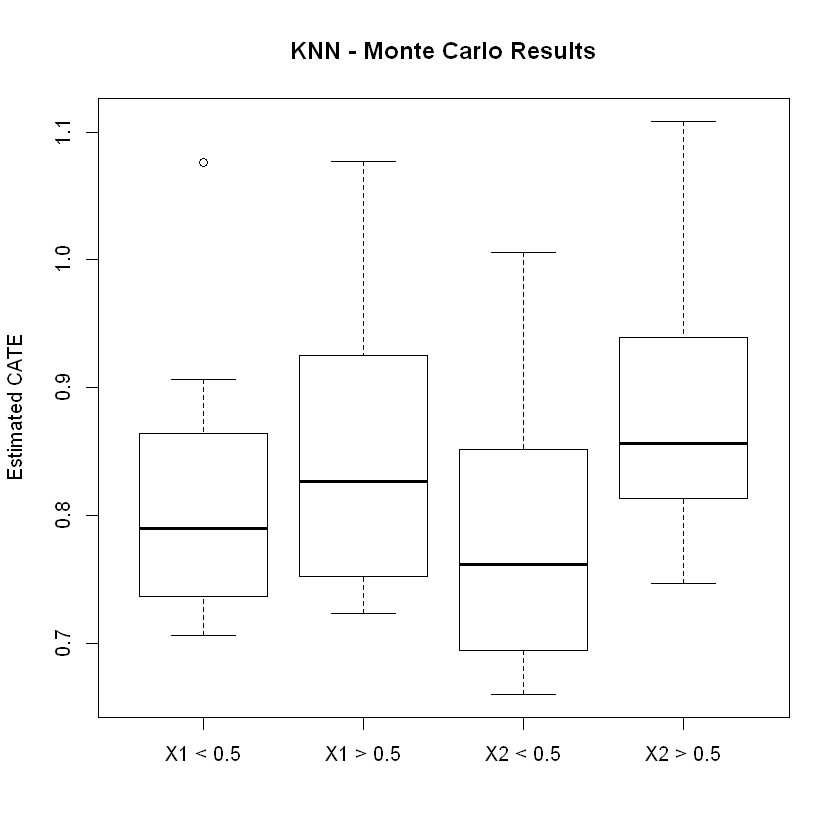

In [25]:
knn_simstudy(10,20,500,10,dgp.1)

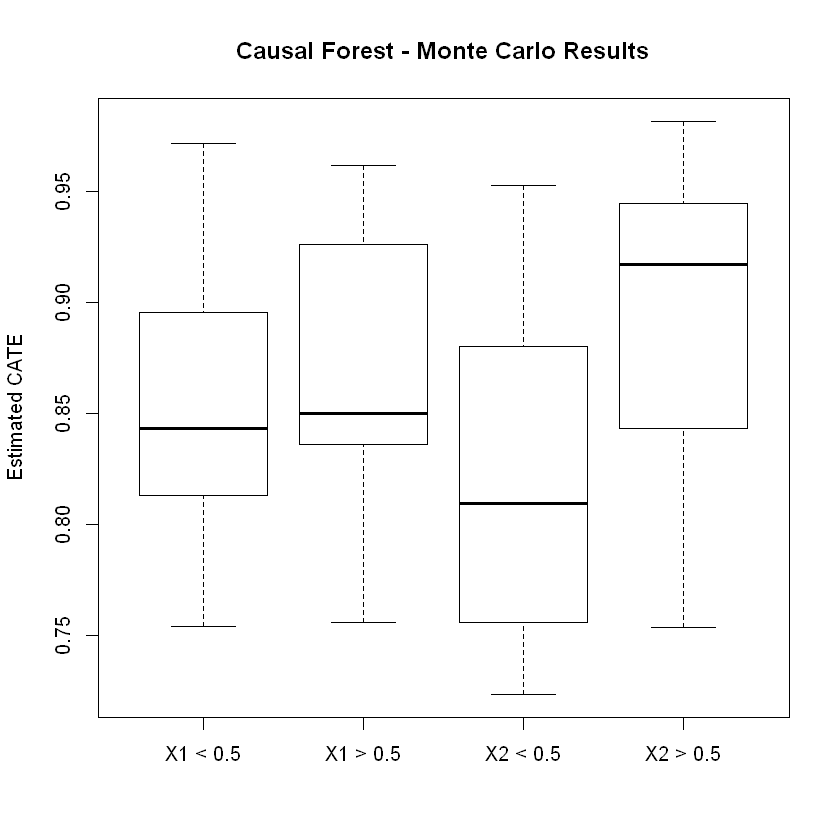

In [22]:
CF_simstudy(20,500,10,dgp.1)

## Plotting a causal forest

In [149]:
library("rpart.plot")

ERROR: Error in library("rpart.plot"): there is no package called 'rpart.plot'


In [ ]:
rpart.plot(
  x=ct_pruned,        # Pruned tree
  type=3,             # Draw separate split labels for the left and right directions
  fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round=1,       # Rounding of the corners of the leaf node boxes
  extra=100,          # Display the percentage of observations in the node
  branch=.1,          # Shape of the branch lines
  box.palette="RdBu") 

## References <a id="references"></a>

* **Athey & Imbens (2015).** [Recursive partitioning for heterogeneous causal effects](https://www.pnas.org/content/113/27/7353). Colloquium Paper.


* **Athey & Wager (2019a).** [Estimating Treatment Effects with Causal Forests: An Application](https://www.gsb.stanford.edu/faculty-research/working-papers/estimating-treatment-effects-causal-forests-application). Working Paper No. 3786. 


* **Athey & Wager (2015).** [Estimation and Inference of Heterogeneous Treatment Effects using Random Forests](https://arxiv.org/abs/1510.04342). 


* **Farbmacher, Kögel & Spindler (2019).** [Heterogeneous Effects of Poverty on Cognition](https://www.mpisoc.mpg.de/en/social-policy-mea/publications/detail/publication/heterogeneous-effects-of-poverty-on-cognition/). MEA Discussion Paper (06-2019).


* **Hitsch & Misra (2018).** [Heterogeneous Treatment Effects and Optimal Targeting Policy Evaluation](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3111957). Randomized Social Experiments eJournal (2018).


* **Powers, Qian, Jung, Schuler, Shah, Hastie & Tibshirani (2017).** [Some methods for heterogeneous treatment effect estimation in high-dimensions](https://web.stanford.edu/~hastie/Papers/PM_Powers_SIM.pdf).Stat Med. 2018 May 20;37(11):1767-1787. 